<a href="https://colab.research.google.com/github/annisaeka123/PCVK-_Semester-5/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM PERTEMUAN 3

Latihan Praktikum 1 - Operasi Citra Sederhana

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Transformasi Linier Brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


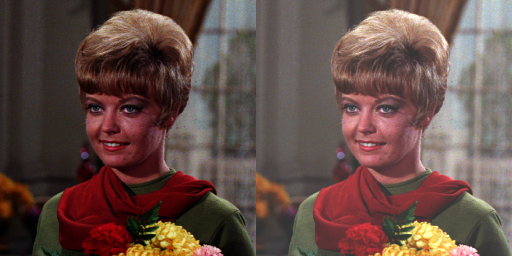

In [61]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros_like(original)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            val = int(original[y, x, c]) + brightness  # cast ke int dulu
            brightness_image[y, x, c] = np.clip(val, 0, 255).astype(np.uint8)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, alpha=1, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

TUGAS PRAKTIKUM 1

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

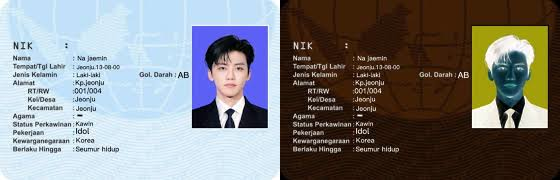

In [62]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')
inverse_img = 255 - img

final = cv.hconcat([img, inverse_img])
cv2_imshow(final)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255..255]: 50
Masukkan kontras [1.0..3.0]: 2


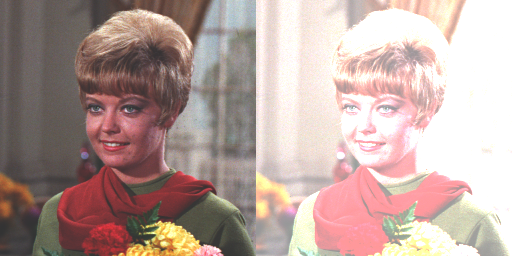

In [63]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

brightness = int(input("Masukkan tingkat kecerahan [-255..255]: "))
contrast = float(input("Masukkan kontras [1.0..3.0]: "))

contrast_img = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final = cv.hconcat([original, contrast_img])
cv2_imshow(final)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Masukkan nilai kecerahan: 50
 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------


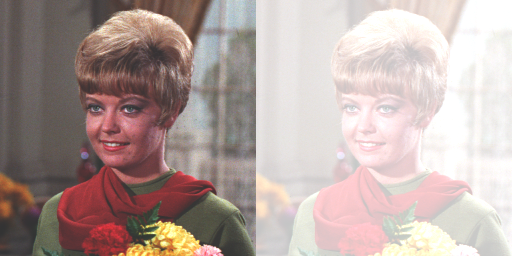

In [64]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------')

c = int(input("Masukkan nilai kecerahan: "))
log_img = c * (np.log1p(original.astype(np.float32)))
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

final = cv.hconcat([original, log_img])
cv2_imshow(final)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori

a. Averaging

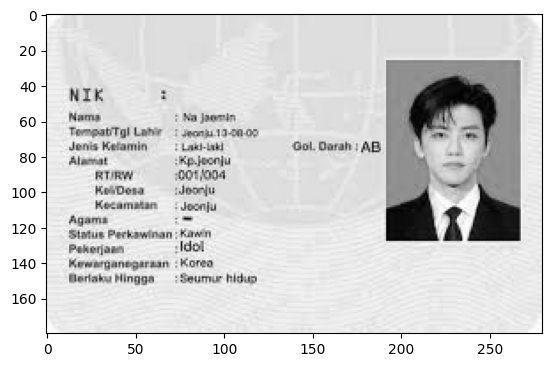

In [71]:
avg_gray = np.mean(img, axis=2).astype(np.uint8)
plt.imshow(avg_gray, cmap='gray')

b. Lightness

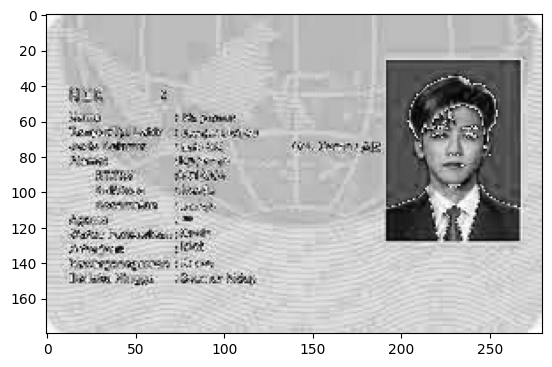

In [72]:
light_gray = ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)
plt.imshow(light_gray, cmap='gray')

c. Luminance

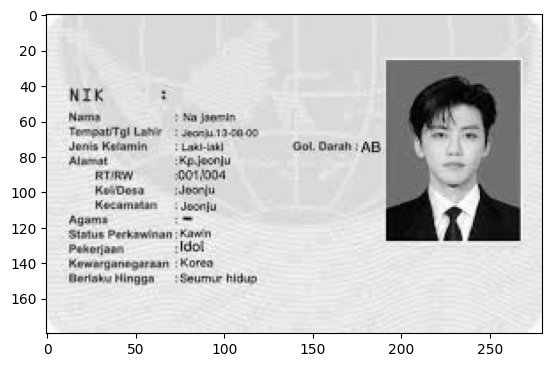

In [73]:
lum_gray = (0.299*img[:,:,2] + 0.587*img[:,:,1] + 0.114*img[:,:,0]).astype(np.uint8)
plt.imshow(lum_gray, cmap='gray')


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

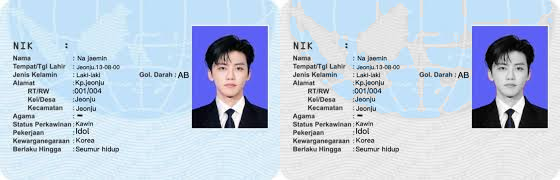

In [74]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# range warna biru
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
mask = cv.inRange(hsv, lower_blue, upper_blue)

# buat grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# gabungkan
selective = np.where(mask[:,:,None].astype(bool), img, gray_bgr)

final = cv.hconcat([img, selective])
cv2_imshow(final)


Praktikum 2 - Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


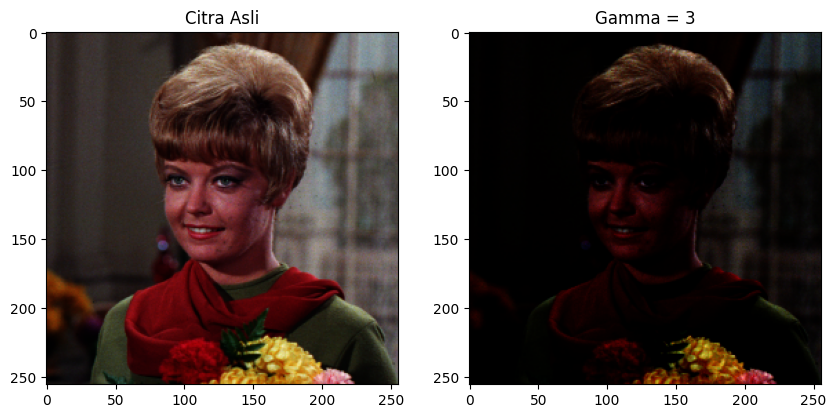

In [79]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))   # bisa float biar fleksibel
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# normalisasi ke [0,1], lalu terapkan gamma
gamma_corrected = np.array(255 * (original / 255.0) ** gamma, dtype=np.uint8)

# simpan ke variabel gamm_img
gamm_img = gamma_corrected

# tampilkan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(original); plt.title("Citra Asli")
plt.subplot(1,2,2); plt.imshow(gamm_img); plt.title(f"Gamma = {gamma}")
plt.show()